# Introduction 

In times of crisis, the ability to swiftly connect with emergency services can mean the difference between life and death. The ubiquitous 911 emergency services number has served as a vital lifeline, providing immediate assistance to those in need across North America. This project digs into the world of 911 emergency calls, exploring both the fundamental purpose and the invaluable data associated with these urgent communications.

Understanding the Essence of 911 Calls:
The essence of 911 lies in its simplicity and urgency. When faced with emergencies ranging from medical crises to criminal activities or fire incidents, individuals dial 911 seeking prompt intervention from police, fire departments, or medical services. It is the first and crucial step toward mobilizing resources to address unforeseen situations.

Navigating Emergency Call Centers:
911 calls find their way to emergency call centers, where skilled dispatchers play a pivotal role. These professionals are trained to collect vital information swiftly, ensuring that the appropriate emergency response is dispatched to the scene. The evolution of technology, particularly Enhanced 911 (E911) systems, has added a layer of efficiency by automatically providing the caller's location.

The Pulse of Emergency Services Data:
Beyond its immediate life-saving function, 911 call data holds a wealth of information. This project aims to analyze key metrics, including the total volume of 911 calls, the distribution of call types, locations, and geographic variations. By decoding this data, we gain insights into the patterns, trends, and challenges that emergency services face.

Significance of Analysis:
Understanding the dynamics of 911 calls is not only essential for optimizing emergency response strategies but also for providing valuable insights into societal safety concerns.Taking the data set of 911 calls in Montgomery County region in Pennsylvania we aim to uncover the narratives hidden within the data, contributing to the ongoing enhancement of emergency services and public safety.

In [886]:
#importing necessary libraries(some libraries might not be useful)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [887]:
#reading data (the data is taken from kaggle)
df=pd.read_csv('911.csv')

In [888]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [890]:
#changing the column names

df.columns=['latitude','longitude','discription','zipcode','title','timestamp','township','address','e']
df.head()

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [891]:
#finding null values
for col in df.columns:
    missing=sum(df[col].isnull())
    print(col,'-',missing)

latitude - 0
longitude - 0
discription - 0
zipcode - 80199
title - 0
timestamp - 0
township - 293
address - 0
e - 0


there are some nulls but instead of removing data,it is more optimal by not using some specific columns for some visualizations 

In [892]:
#  top 5 zipcodes for 911 calls in given zipcodes

df['zipcode'].value_counts().head(5)

zipcode
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [893]:
# top 5 townships for 911 calls

d=df['township'].value_counts().head(15)
d=d.reset_index()
d.head()

,township,count
0,LOWER MERION,55490
1,ABINGTON,39947
2,NORRISTOWN,37633
3,UPPER MERION,36010
4,CHELTENHAM,30574


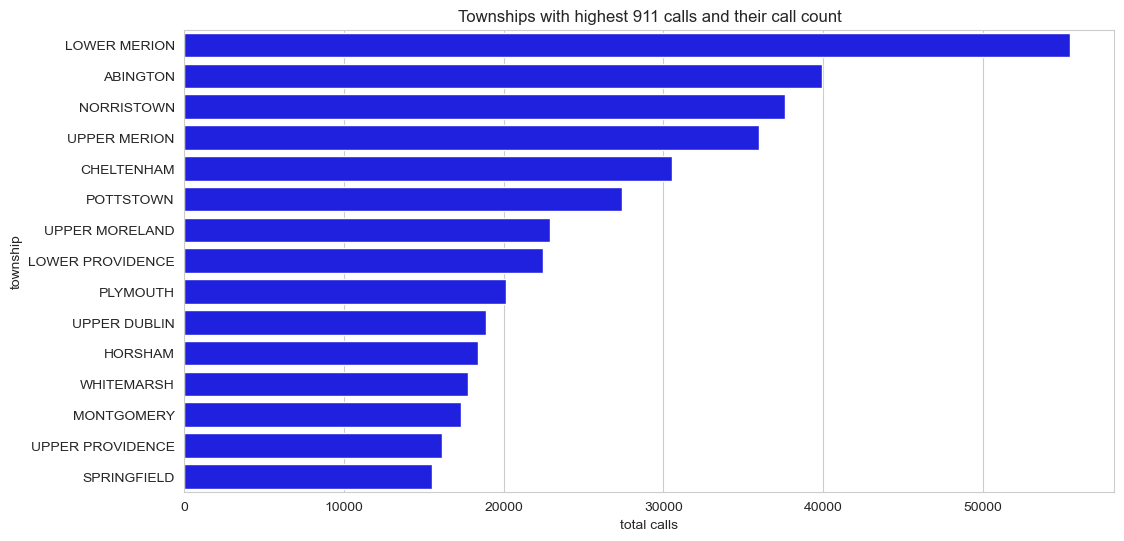

In [938]:
plt.figure(figsize=(12,6))
sns.barplot(y='township',x='count',data=d,color='blue')
plt.ylabel('township')
plt.xlabel('total calls')
plt.title('Townships with highest 911 calls and their call count')
plt.show()

In [895]:
#total number of unique title codes

df['title'].nunique()

148

In [896]:
#spliting the title to get reasons and reason category in two possible ways

def col(x):
    c=x.split(':')
    p=c[0]
    return p

In [897]:
df['reason_category']=df['title'].apply(lambda x:col(x))

In [898]:
df['reason_category'].dtype

dtype('O')

In [899]:
df['reason']=df['title'].str.split(':',expand=True)[1].str.replace(' -','')

In [900]:
df['reason'].dtype

dtype('O')

In [901]:
df.head(2)

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e,reason_category,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY


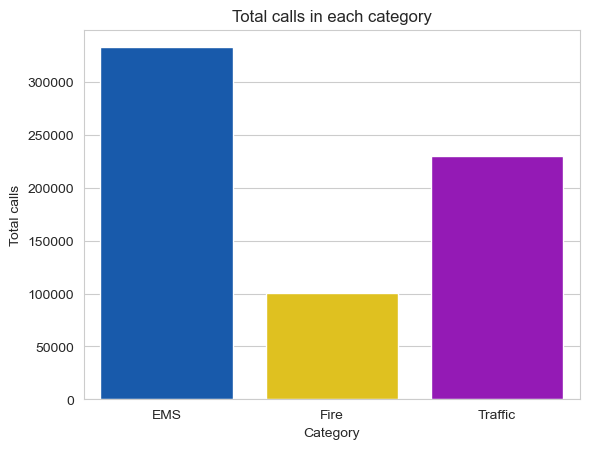

In [902]:
sns.countplot(x='reason_category',data=df,palette='prism')
plt.title('Total calls in each category')
plt.ylabel('Total calls')
plt.xlabel('Category')
plt.show()

In [903]:
#creating a new dataframe for easy plotting

df2=df['reason'].value_counts().head(15)
df2.head(3)

reason
 VEHICLE ACCIDENT    184749
 DISABLED VEHICLE     47917
 FIRE ALARM           38452
Name: count, dtype: int64

In [904]:
#converting series to dataframe

df2=df2.reset_index()
df2.head(3)

,reason,count
0,VEHICLE ACCIDENT,184749
1,DISABLED VEHICLE,47917
2,FIRE ALARM,38452


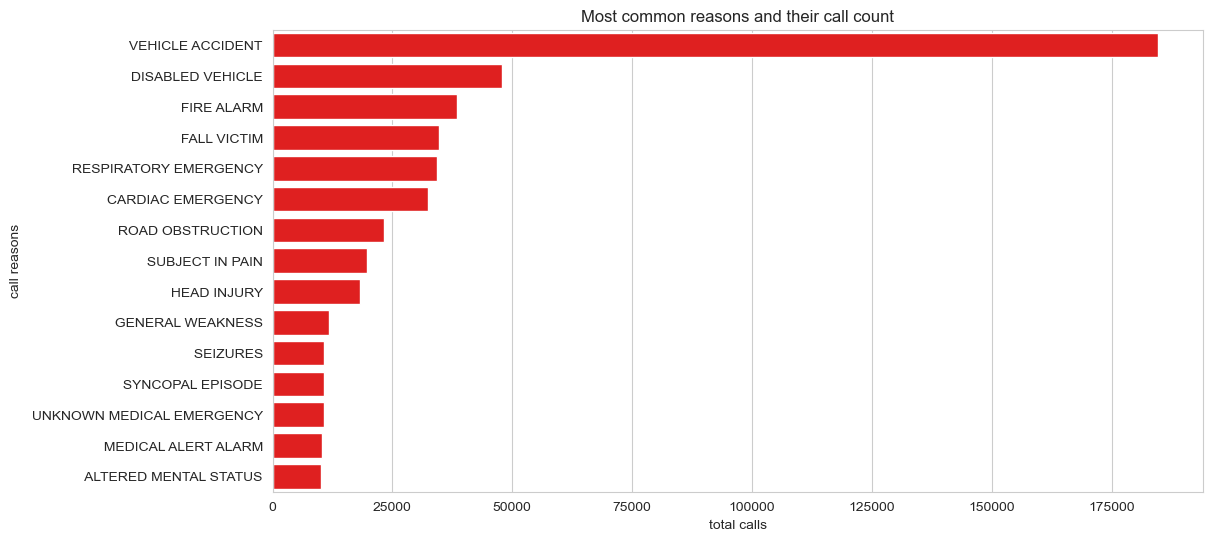

In [905]:
plt.figure(figsize=(12,6))
sns.barplot(y='reason',x='count',data=df2,color='red')
plt.ylabel('call reasons')
plt.xlabel('total calls')
plt.title('Most common reasons and their call count')
plt.show()

In [906]:
#for extracting date the dtype need to be datetime
type(df['timestamp'][0])

str

In [907]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [908]:
df['timestamp'].dtype

dtype('<M8[ns]')

using inbuilt fuctions hour,month,day_of_week we can split the timestamp

In [909]:
df['hour']=df['timestamp'].apply(lambda x:x.hour)

In [910]:
df['month']=df['timestamp'].apply(lambda x:x.month)

In [911]:
df['Day of week']=df['timestamp'].apply(lambda x:x.day_of_week)

In [912]:
df.head(2)

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e,reason_category,reason,hour,month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3


In [913]:
#changing values of in day_of_week column into something relatable
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [914]:
df['Day of week']=df['Day of week'].map(dmap)

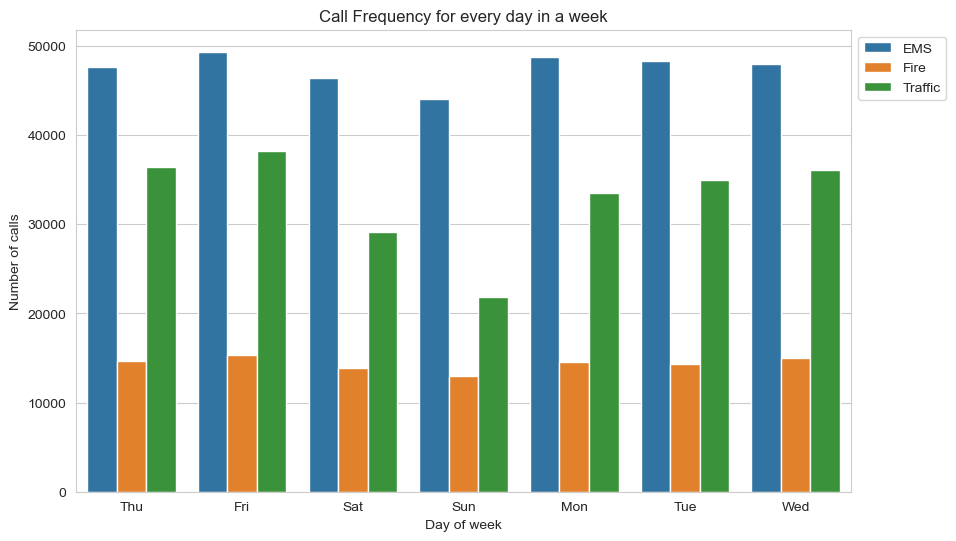

In [915]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Day of week',hue='reason_category')
plt.title('Call Frequency for every day in a week')
plt.ylabel('Number of calls')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

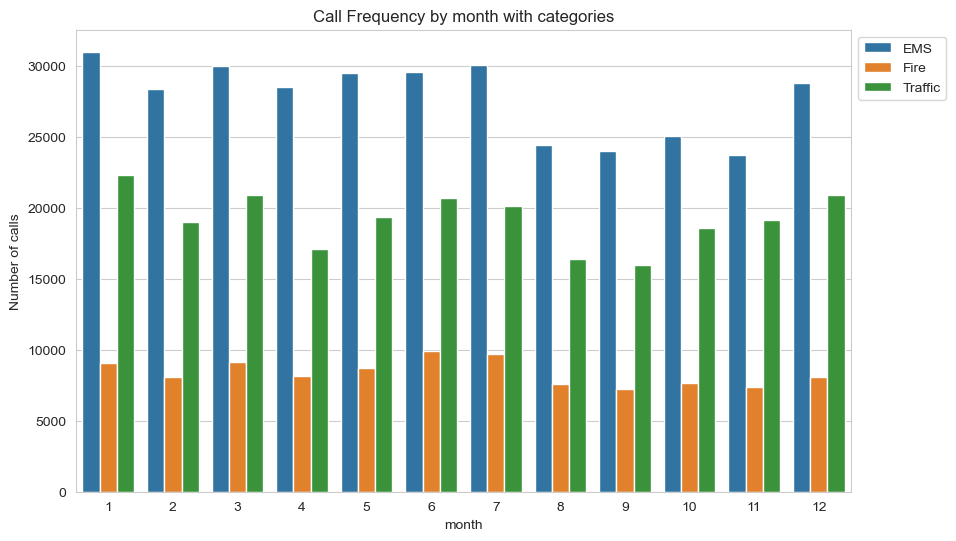

In [916]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='month',hue='reason_category')
plt.title('Call Frequency by month with categories')
plt.ylabel('Number of calls')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [917]:
 bymonth=df.groupby('month').count()

In [918]:
bymonth

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e,reason_category,reason,hour,Day of week
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


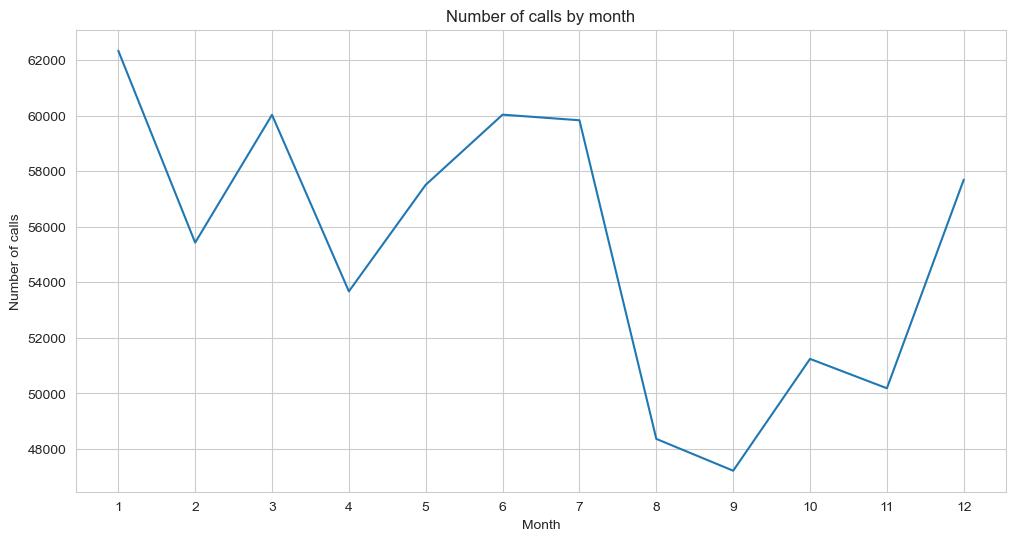

In [919]:
plt.figure(figsize=(12,6))
bymonth['e'].plot()
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Number of calls')
plt.title('Number of calls by month')
plt.show()

<Figure size 1200x1200 with 0 Axes>

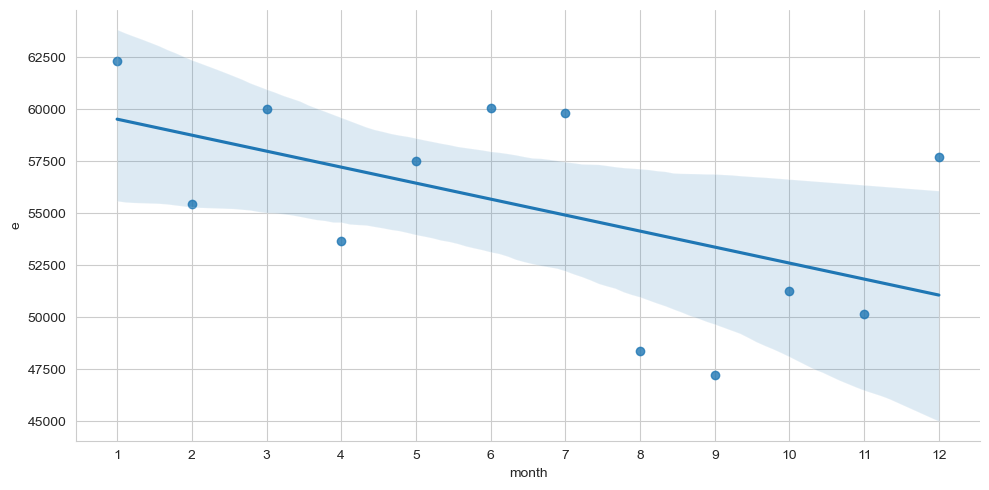

In [921]:
plt.figure(figsize=(12,12))
sns.lmplot(data=bymonth.reset_index(),x='month',y='e',height=5,aspect=2)
plt.xticks(range(1, 13))
plt.show()

The primary purpose of lmplot is to fit and visualize linear regression models. It helps you explore relationships between two numeric variables in this case it is total calls and months.
The regression line in the plot represents the trend in the data, and the shaded area around it indicates the confidence interval(range of values you expect your estimate to fall between).

In [922]:
df['date']=df['timestamp'].apply(lambda x:x.date())

In [923]:
df.head()

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e,reason_category,reason,hour,month,Day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,16,12,Thu,2015-12-10


In [924]:
#grouping data w.r.t date 
bydate=df.groupby('date').count()

In [925]:
bydate.head()

,latitude,longitude,discription,zipcode,title,timestamp,township,address,e,reason_category,reason,hour,month,Day of week
date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


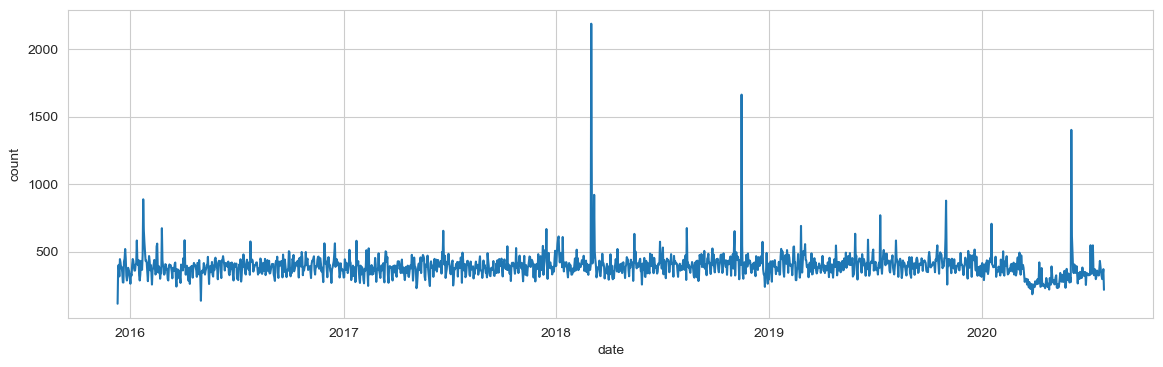

In [926]:
#call frequency on daily basis
plt.figure(figsize=(14,4))
bydate['e'].plot()
plt.ylabel('count')
plt.show()

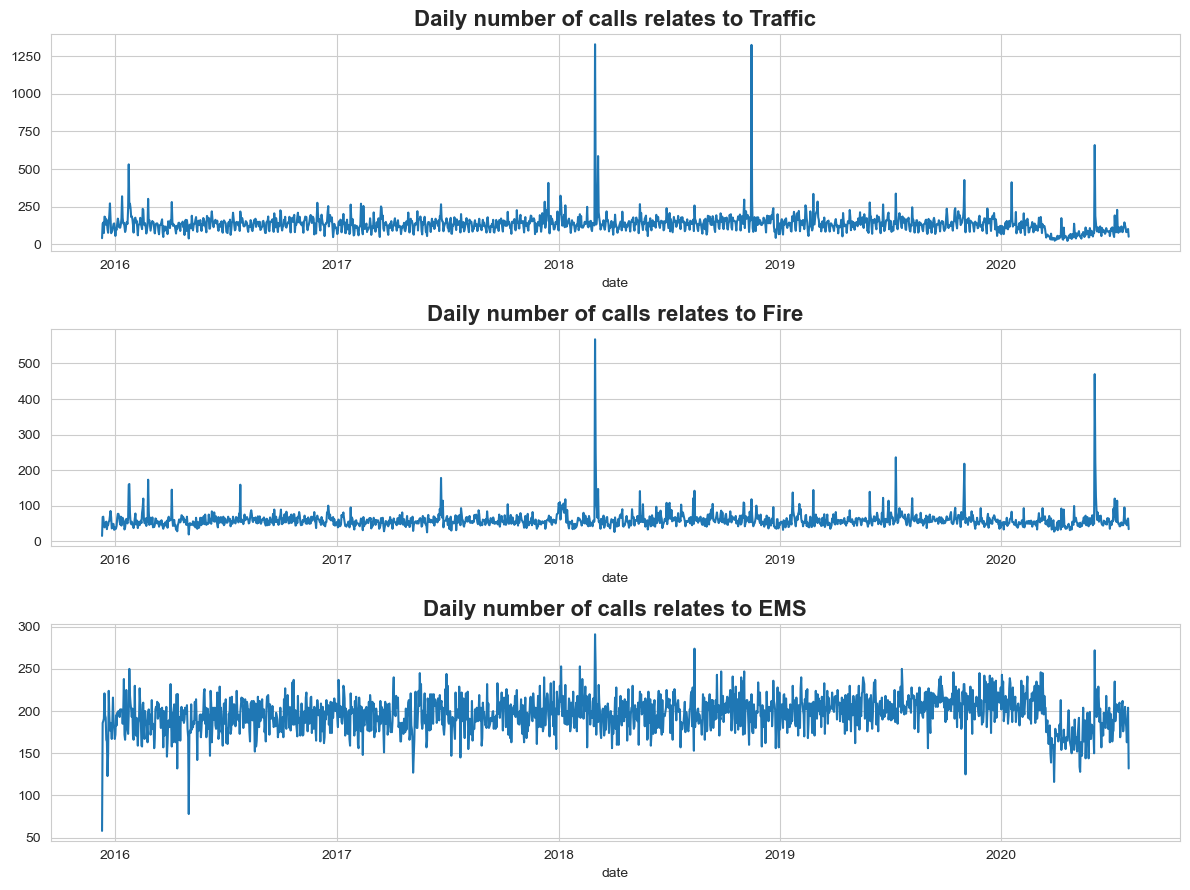

In [927]:
#plotting call frequency by date for each category

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))

# Plot for Traffic
df[df['reason_category'] == 'Traffic'].groupby('date').count()['e'].plot(ax=axes[0])
axes[0].set_title('Daily number of calls relates to Traffic',fontsize=16,fontweight='bold')

# Plot for Fire
df[df['reason_category'] == 'Fire'].groupby('date').count()['e'].plot(ax=axes[1])
axes[1].set_title('Daily number of calls relates to Fire',fontsize=16,fontweight='bold')

# Plot for EMS
df[df['reason_category'] == 'EMS'].groupby('date').count()['e'].plot(ax=axes[2])
axes[2].set_title('Daily number of calls relates to EMS',fontsize=16,fontweight='bold')

plt.tight_layout()
plt.show()

The sudden spike in the call frequency is on 2nd march 2018 is because of a devasting cyclone (nor'easter) hiting the atlantic cost of USA where huge amount of snow fall has occured at alarming rates causing chaos in people which eventually lead to more number of 911 calls

In [928]:
#finding the date with most calls
df['date'].value_counts().head(5)

date
2018-03-02    2187
2018-11-15    1662
2020-06-03    1401
2018-03-07     920
2018-03-03     917
Name: count, dtype: int64

#### Using pivot table function doesn't give the required output while dealing with count of data so the better option is doing groupby with 2 column data that we are performing heatmap on with count function and later unstack the data to get a better matrix data 

In [929]:
g=df.groupby(['Day of week','hour']).count()['e']

In [930]:
g.head()

Day of week  hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
Name: e, dtype: int64

In [931]:
h=g.unstack(level=-1)

In [932]:
h

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


#### Heatmaps can also be used to display the distribution of values across two categorical variables. This is often done using a 2D histogram-like representation, where each cell represents the frequency or density of occurrences.

<Axes: xlabel='hour', ylabel='Day of week'>

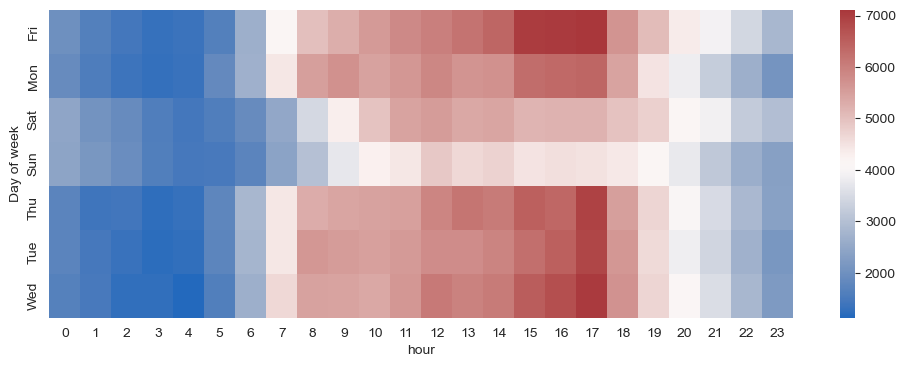

In [933]:
plt.figure(figsize=(12,4))
sns.heatmap(h,cmap='vlag')

In [934]:
#f=plt.figure(figsize=(12,12))
#sns.clustermap(h)

In [935]:
x=df.groupby(['Day of week','month']).count()['e'].unstack(level=-1)

In [936]:
x.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
Day of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='month', ylabel='Day of week'>

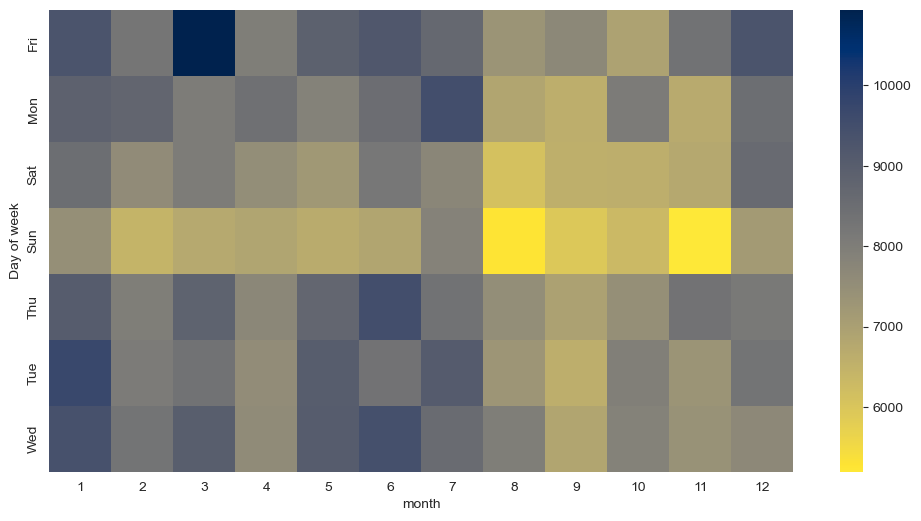

In [937]:
plt.figure(figsize=(12,6))
sns.heatmap(x,cmap='cividis_r')

# Conclusion: 
In the course of this exploratory data analysis (EDA) project, our primary goal was to gain valuable insights into the emergency call data, specifically focusing on 911 calls. Through meticulous examination of key metrics, we have uncovered significant patterns and trends that contribute to a comprehensive understanding of emergency call frequencies across various dimensions.

### Overall 911 Call Volume:
We started by examining the overall volume of 911 calls, providing a foundational understanding of the scale and scope of emergency incidents.

### Distribution of Call Types:
Our analysis investigated into the distribution of call types, revealing the nature and diversity of emergency situations. This information is crucial for emergency response planning and resource allocation.

### Temporal Patterns:
We explored temporal patterns, such as hourly, daily,weekly and monthly variations in call frequencies. This allows for a nuanced understanding of when emergencies are more likely to occur, aiding in optimizing emergency response strategies.

### Geospatial Analysis:
The geographical distribution of emergency incidents was another focal point. This analysis helps identify townships with higher call volumes.
